# Student Performance Rating Prediction

This notebook preprocesses the student data and trains a machine learning model to predict student ratings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

<frozen importlib._bootstrap>:488: RuntimeWarning: The global interpreter lock (GIL) has been enabled to load module 'pandas._libs.pandas_parser', which has not declared that it can run safely without the GIL. To override this behavior and keep the GIL disabled (at your own risk), run with PYTHON_GIL=0 or -Xgil=0.


## 1. Load Data

In [3]:
# Load the dataset
df = pd.read_csv('student_rating_factor.csv')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (6607, 7)


,Attendance,Extracurricular_Activities,Previous_Scores_1,previous_Score_2,Assignment_Score,Previous_Semester_CGPA,Rating
0,84,No,73,67,37,6.9,6.8
1,64,No,59,61,31,6.1,6.6
2,98,Yes,91,74,39,8.5,8.6
3,89,Yes,98,71,43,8.6,9.2
4,92,Yes,65,70,31,7.1,7.0


## 2. Preprocessing

In [4]:
# Check for missing values
print(df.isnull().sum())

# Encode Categorical Variables
# 'Extracurricular_Activities' is Yes/No. We convert to 1/0.
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})

# Verify conversion
df.head()

Attendance                    0
Extracurricular_Activities    0
Previous_Scores_1             0
previous_Score_2              0
Assignment_Score              0
Previous_Semester_CGPA        0
Rating                        0
dtype: int64


,Attendance,Extracurricular_Activities,Previous_Scores_1,previous_Score_2,Assignment_Score,Previous_Semester_CGPA,Rating
0,84,0,73,67,37,6.9,6.8
1,64,0,59,61,31,6.1,6.6
2,98,1,91,74,39,8.5,8.6
3,89,1,98,71,43,8.6,9.2
4,92,1,65,70,31,7.1,7.0


## 3. Exploratory Data Analysis

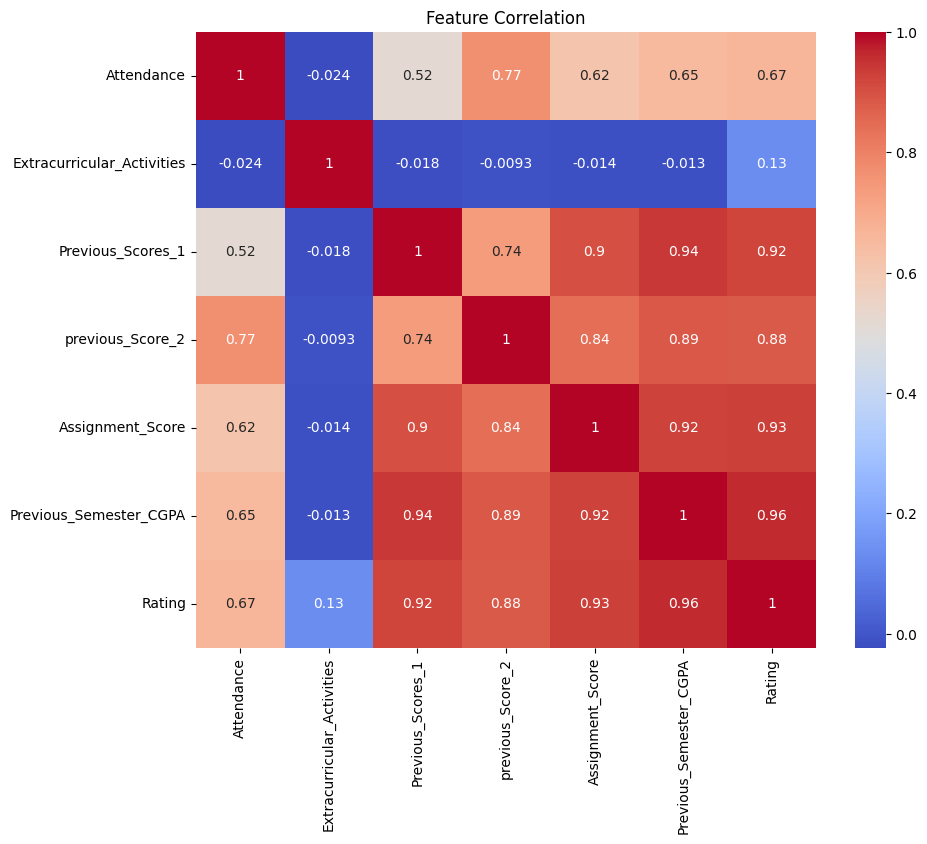

In [5]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

## 4. Train/Test Split

In [6]:
# Define Features (X) and Target (y)
X = df[['Attendance', 'Extracurricular_Activities', 'Previous_Scores_1', 'previous_Score_2', 'Assignment_Score', 'Previous_Semester_CGPA']]
y = df['Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 5285
Testing samples: 1322


## 5. Model Training

In [7]:
# Initialize Models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train Linear Regression
lr_model.fit(X_train, y_train)

# Train Random Forest
rf_model.fit(X_train, y_train)

print("Models trained.")

Models trained.


## 6. Evaluation

In [8]:
# Predict
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Linear Regression
print("--- Linear Regression ---")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.4f}")

# Evaluate Random Forest
print("\n--- Random Forest ---")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.4f}")

--- Linear Regression ---
MSE: 0.0852
R2 Score: 0.9675

--- Random Forest ---
MSE: 0.0994
R2 Score: 0.9621


## 7. Save Best Model

In [9]:
# Save the better performing model (likely Random Forest)
best_model = rf_model if r2_score(y_test, y_pred_rf) > r2_score(y_test, y_pred_lr) else lr_model
model_name = "student_rating_model.pkl"
joblib.dump(best_model, model_name)
print(f"Saved best model to {model_name}")

Saved best model to student_rating_model.pkl


## 8. Testing with Real Data

In [13]:
import joblib
import pandas as pd

def predict_rating(attendance: float,
                   extracurricular: int,
                   prev1: float,
                   prev2: float,
                   assignment: float,
                   cgpa: float) -> float:
    """
    Load the saved model and return a prediction for one student.
    `extracurricular` must be 1 or 0 (Yes/No).
    """
    model = joblib.load("student_rating_model.pkl")   # same name as in notebook
    X = pd.DataFrame(
        [[attendance, extracurricular, prev1, prev2, assignment, cgpa]],
        columns=[
            "Attendance",
            "Extracurricular_Activities",
            "Previous_Scores_1",
            "previous_Score_2",
            "Assignment_Score",
            "Previous_Semester_CGPA",
        ],
    )
    return model.predict(X)[0]


if __name__ == "__main__":
    print("Enter student details to predict rating:")
    attendance = float(input("  Attendance: "))
    ec = input("  Extracurricular Activities (Yes/No): ").strip().lower()
    ec = 1 if ec.startswith("y") else 0
    prev1 = float(input("  Previous Scores 1: "))
    prev2 = float(input("  Previous Scores 2: "))
    assignment = float(input("  Assignment Score: "))
    cgpa = float(input("  Previous Semester CGPA: "))

    rating = predict_rating(attendance, ec, prev1, prev2, assignment, cgpa)
    print(f"\nPredicted Rating: {rating:.2f}")

Enter student details to predict rating:

Predicted Rating: 7.40
